# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Feb-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer.

#### Report 3 - focus on the demographics of the research population; a. focus on age bands

In [1]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

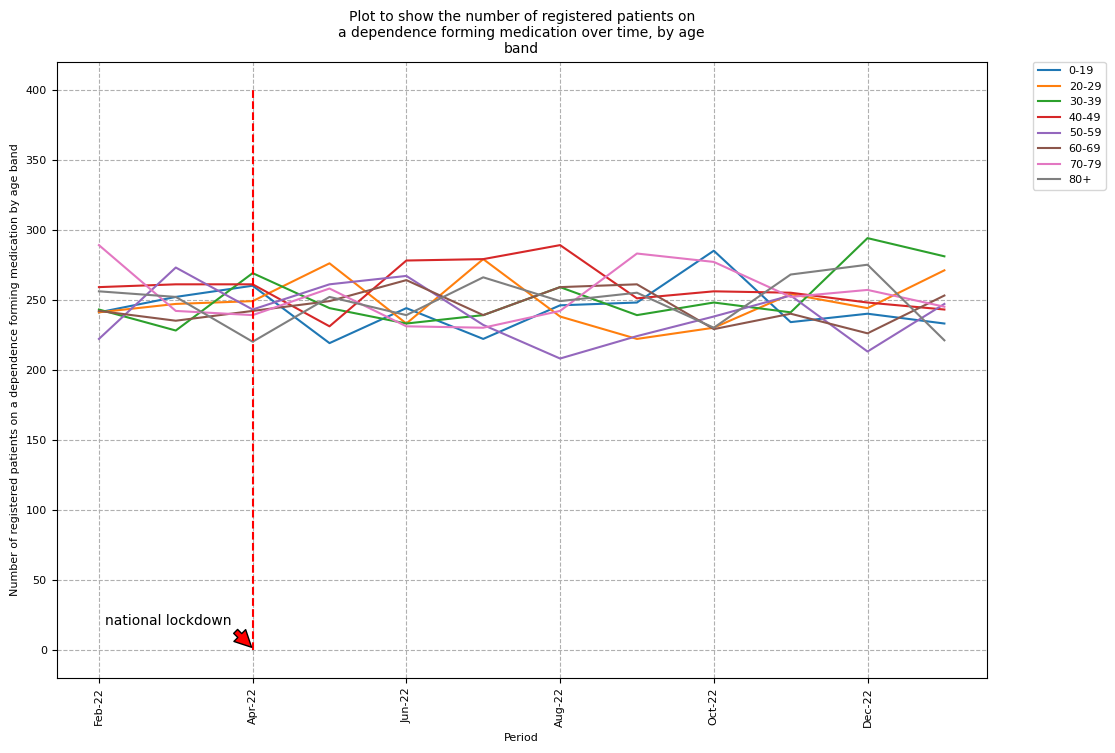

In [2]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [3]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     241      241      243      259      222      242      289    256
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23     233      271      281      243      247      253      245    221


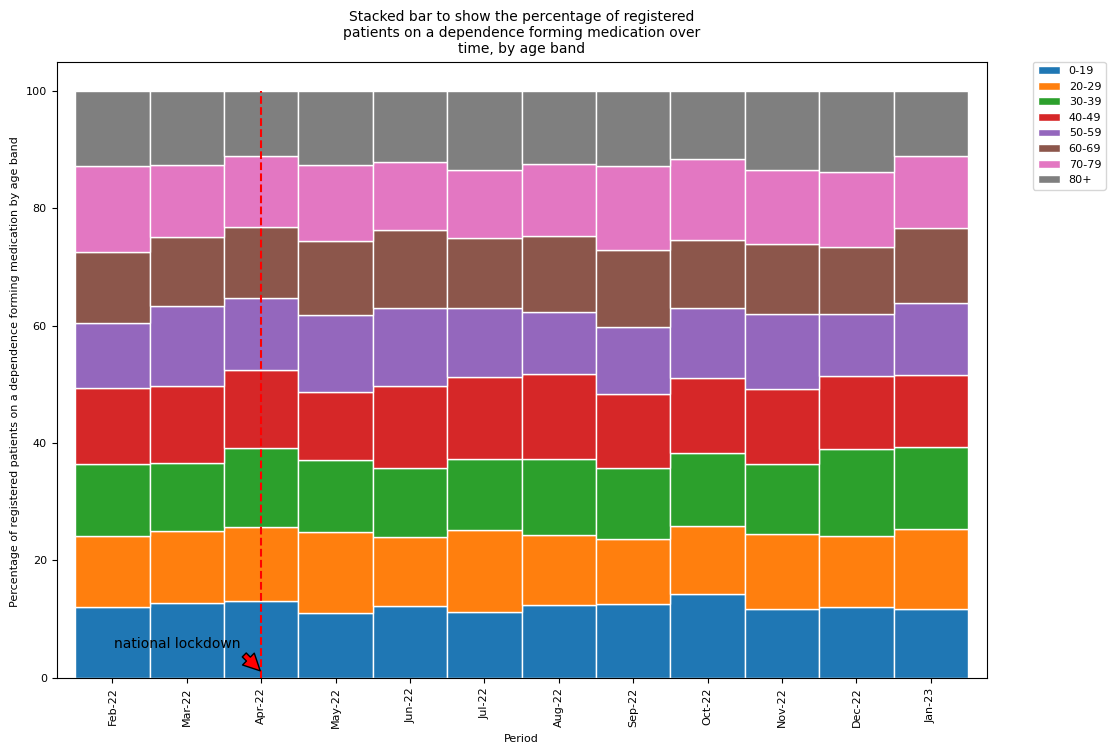

In [4]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
totam = df_age_stacked.sum(axis=1)
peram = df_age_stacked.div(totam, axis=0).mul(100).round(2)
ax = peram.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [5]:
print(tabulate(peram.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peram.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.09    12.09    12.19       13    11.14    12.14     14.5  12.84
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   11.69    13.59    14.09    12.19    12.39    12.69    12.29  11.08


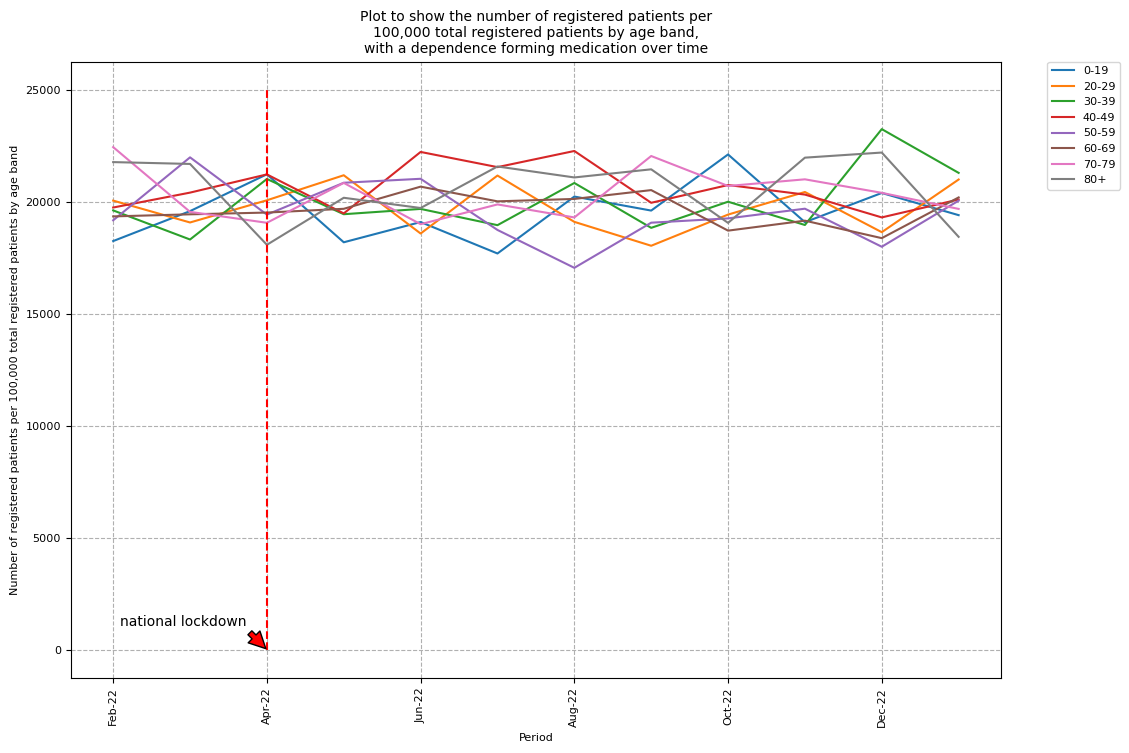

In [6]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [7]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  18243.8  20049.9  19612.6  19740.9    19171  19344.5  22437.9  21768.7
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  -------  -------  -------  -------  -------  -------  -------  -----
Jan-23  19400.5  20991.5  21287.9  20099.3  20048.7  20191.5  19678.7  18432


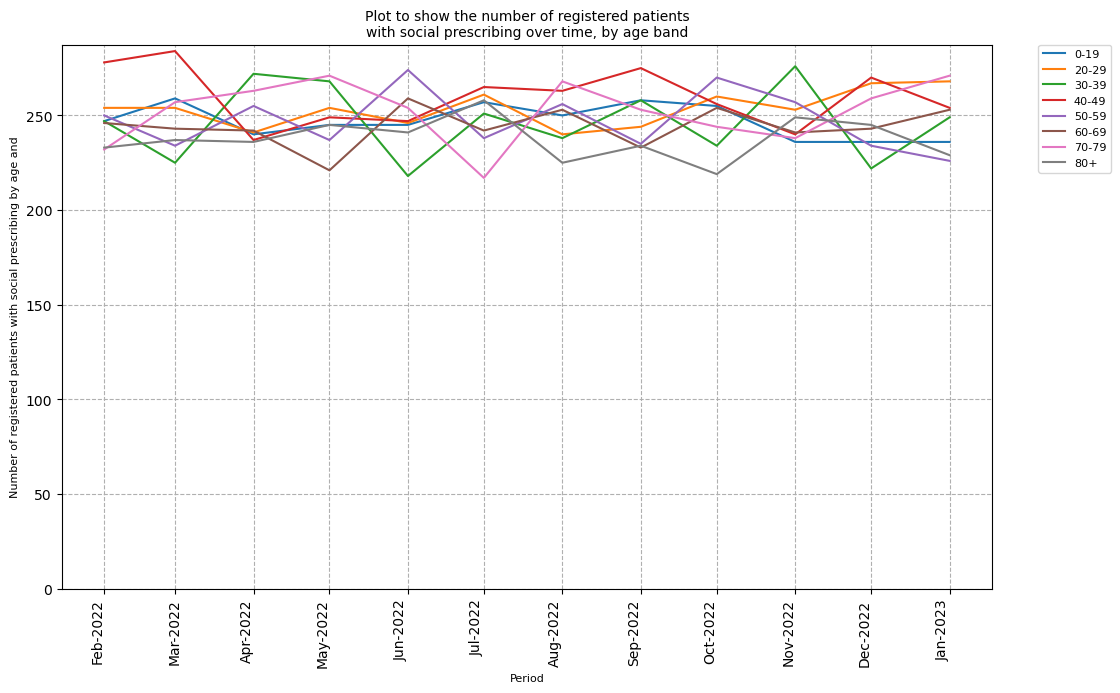

In [8]:
data_measure_social_prescribing_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_social_prescribing_age_rate)
df2 = df.groupby(['date', 'age_band']).population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by age and', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [9]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     247      254      247      278      250      246      232    233
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     236      268      249      254      226      253      271    229


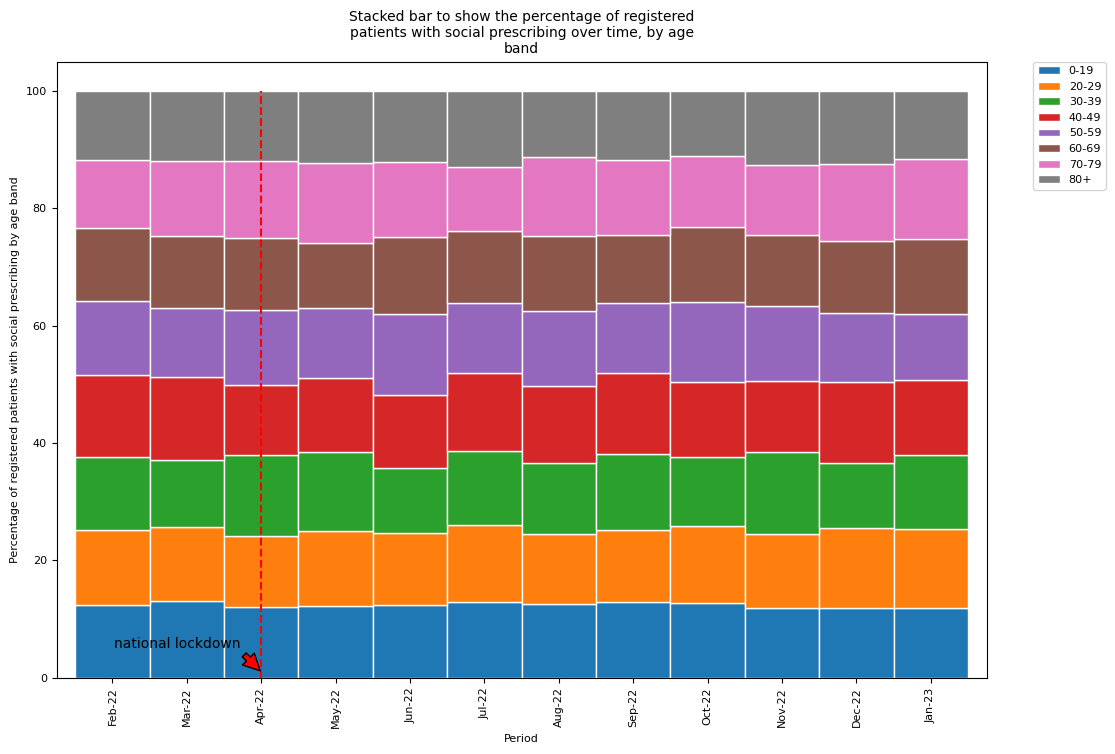

In [10]:
df_age_social_stacked = pd.DataFrame(df2)
df_age_social_stacked.head()
df_age_social_stacked.index = pd.to_datetime(df_age_social_stacked.index).strftime('%b-%y')
totas = df_age_social_stacked.sum(axis=1)
peras = df_age_social_stacked.div(totas, axis=0).mul(100).round(2)
ax = peras.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [11]:
print(tabulate(peras.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peras.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.43    12.78    12.43    13.99    12.58    12.38    11.68  11.73
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   11.88    13.49    12.54    12.79    11.38    12.74    13.65  11.53


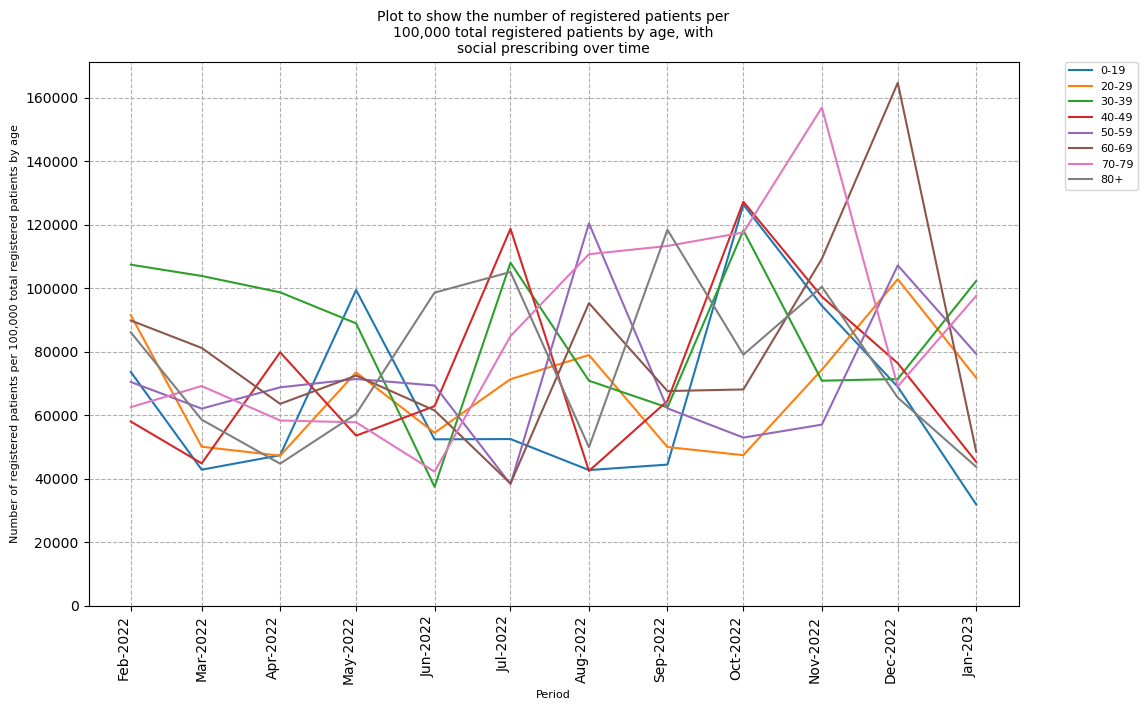

In [12]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'age_band']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [13]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  73616.7  91493.9   107390  58007.1  70462.7  89826.3  62534.3  86084.3
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-01-01 00:00:00  31865.4  71751.5   102271  45277.2  79280.3  48501.3  97593.3  43723.1


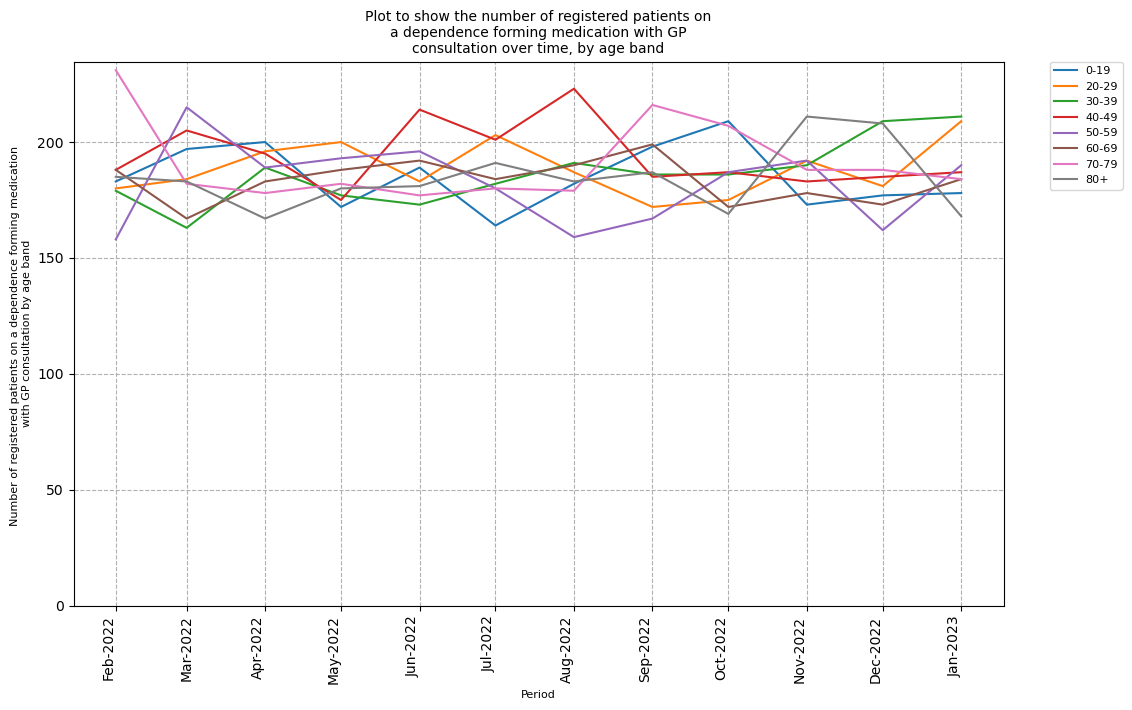

In [14]:
data_measure_consultation_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["with_consultation"] == 1, :]
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_consultation_age_rate)
df2 = df.groupby(['date', 'age_band']).research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [15]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     183      180      179      188      158      188      231    185
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00     178      209      211      187      190      184      184    168


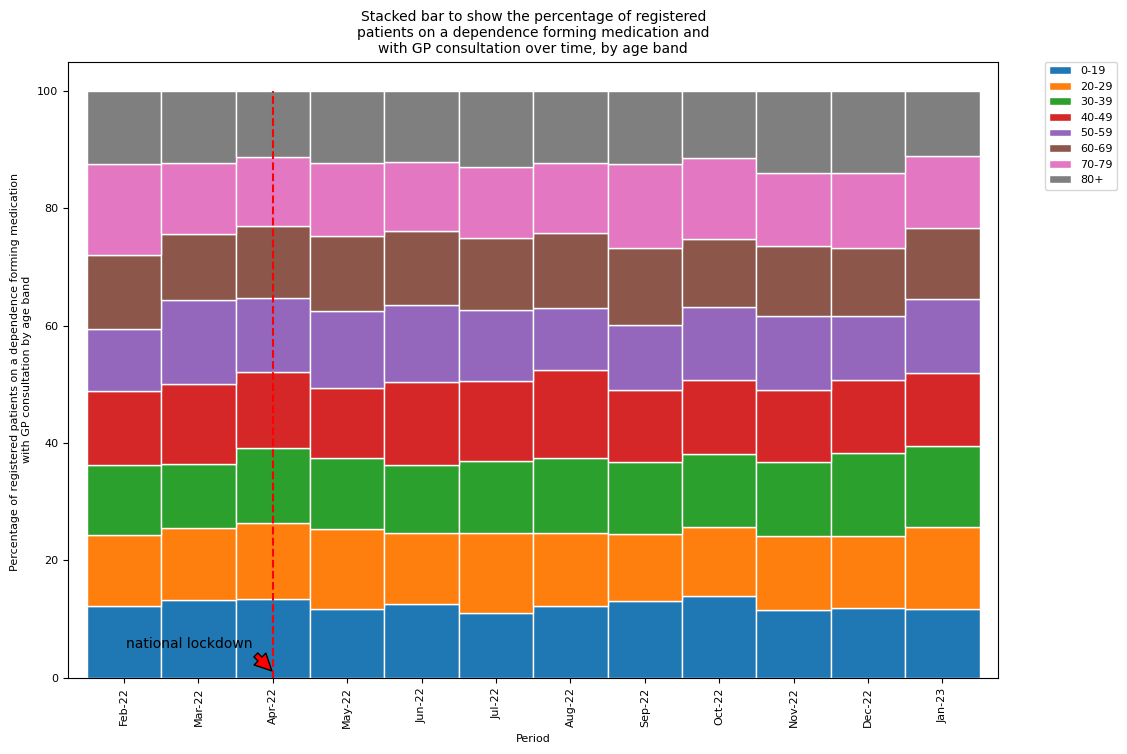

In [16]:
df_age_consult_stacked = pd.DataFrame(df2)
df_age_consult_stacked.head()
df_age_consult_stacked.index = pd.to_datetime(df_age_consult_stacked.index).strftime('%b-%y')
totac = df_age_consult_stacked.sum(axis=1)
perac = df_age_consult_stacked.div(totac, axis=0).mul(100).round(2)
ax = perac.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [17]:
print(tabulate(perac.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perac.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.27    12.06       12     12.6    10.59     12.6    15.48   12.4
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Jan-23   11.78    13.83    13.96    12.38    12.57    12.18    12.18  11.12


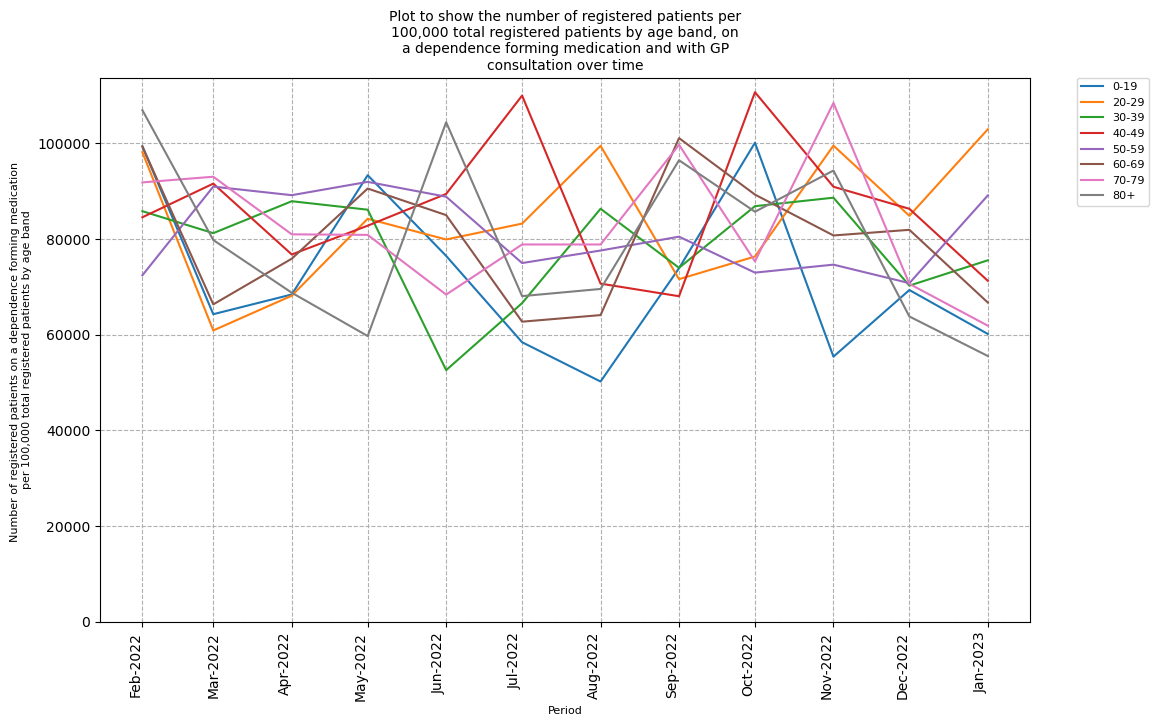

In [18]:
df1 = df.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df2 = df1.groupby(['date', 'age_band']).weighted_research_population.sum().unstack()

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by age band', fontsize=8)
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [19]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79     80+
-------------------  -------  -------  -------  -------  -------  -------  -------  ------
2022-02-01 00:00:00  99370.9  98145.9  85817.8  84543.8  72413.8  99332.1  91832.8  106926
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -----
2023-01-01 00:00:00  60147.9   102946  75551.9  71256.5  89116.2  66711.6  61879.6  55539
